<a href="https://colab.research.google.com/github/Gonzalo-Perez-Di-Chiaro/Trabajo.Coderhouse/blob/main/Proyecto_PartelII_Gonzalo_Perez_Di_Chiaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


url = "https://raw.githubusercontent.com/Gonzalo-Perez-Di-Chiaro/Trabajo.Coderhouse/main/stroke_data%20-%20stroke_data.csv.csv"
df = pd.read_csv(url)
df

!pip install pandas matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el archivo CSV
file_path = "/mnt/data/stroke_data - stroke_data.csv (1).csv"


# Mostrar las primeras filas del DataFrame
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


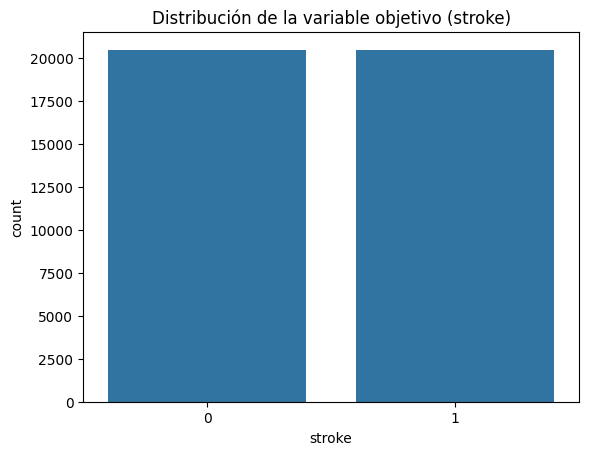

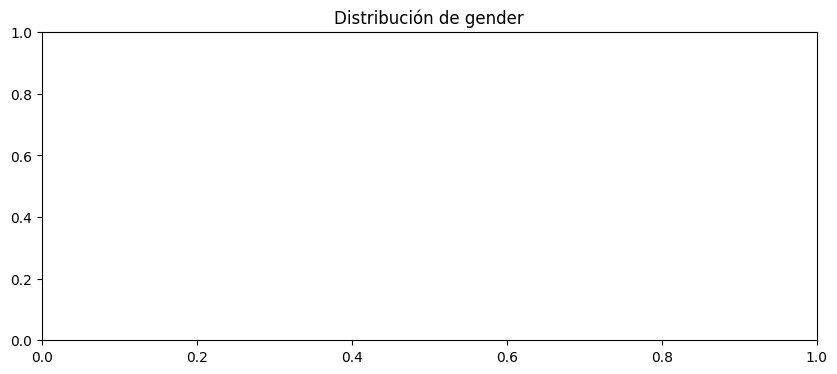

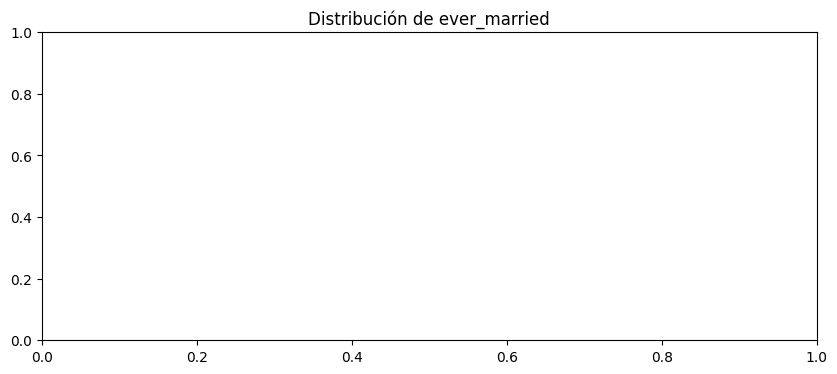

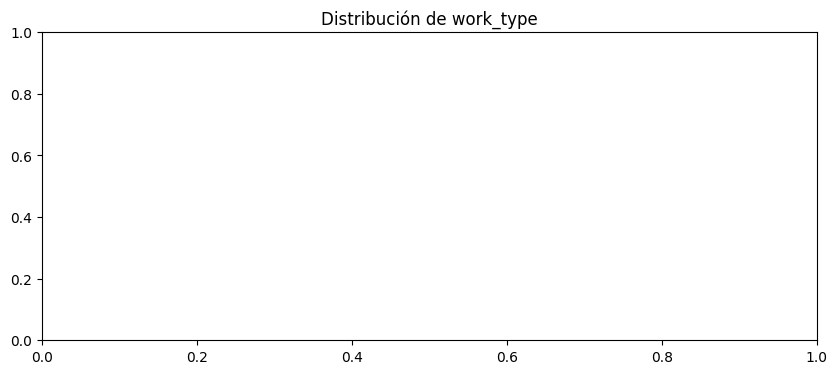

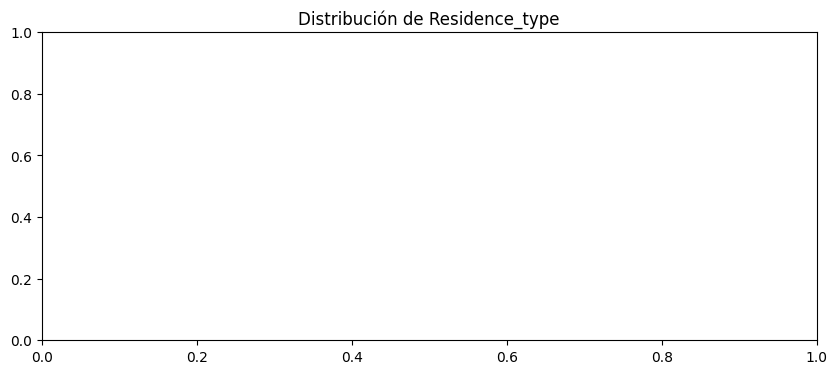

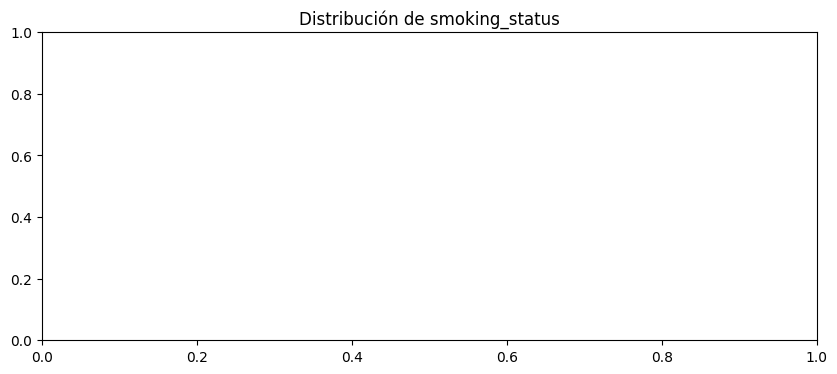

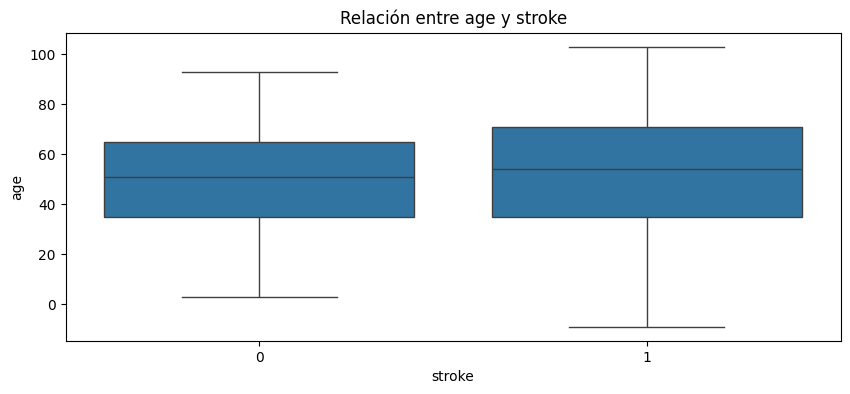

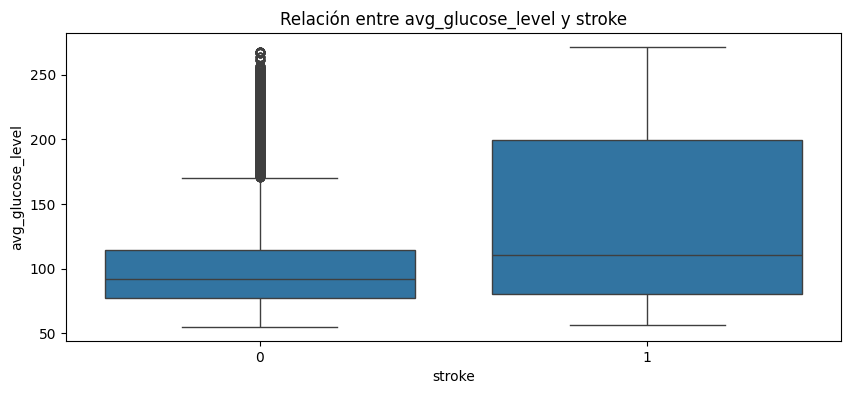

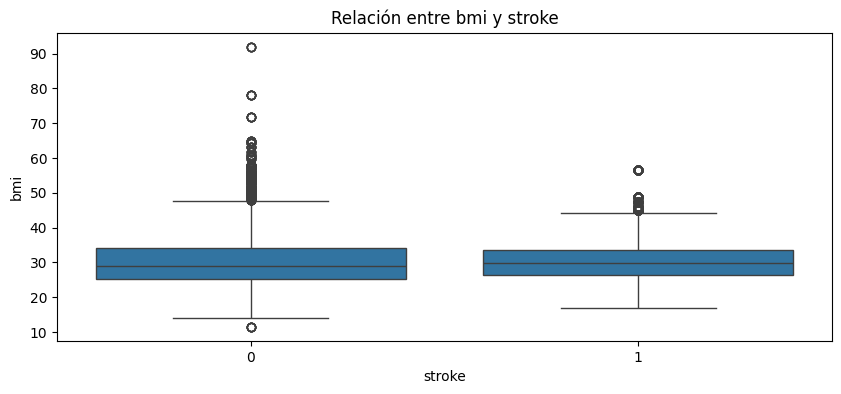

In [4]:
# Información básica del DataFrame
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Comprobar valores nulos
df.isnull().sum()

# Eliminar filas con valores nulos (si es necesario)
df.dropna(inplace=True)

# Distribución de la variable objetivo
sns.countplot(x='stroke', data=df)
plt.title('Distribución de la variable objetivo (stroke)')
plt.show()

# Distribución de variables categóricas
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribución de {var}')
    plt.show()

# Relación entre variables numéricas y la variable objetivo
numeric_vars = ['age', 'avg_glucose_level', 'bmi']
for var in numeric_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='stroke', y=var, data=df)
    plt.title(f'Relación entre {var} y stroke')
    plt.show()

In [14]:
# Codificar variables categóricas
label_encoders = {}
for var in categorical_vars:
    le = LabelEncoder()

# Normalizar variables numéricas
scaler = StandardScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Separar características (X) y variable objetivo (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)



Características seleccionadas: Index(['sex', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

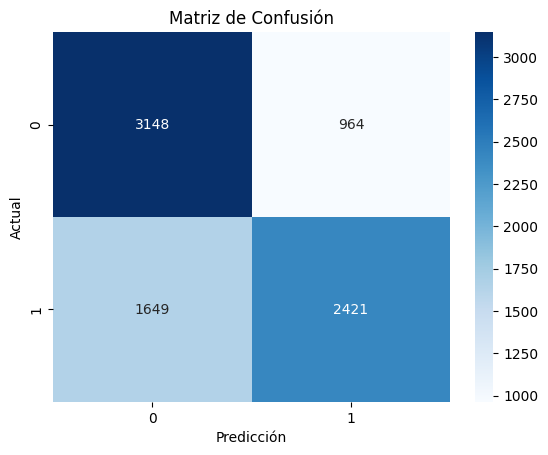

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      4112
           1       0.72      0.59      0.65      4070

    accuracy                           0.68      8182
   macro avg       0.69      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182



In [8]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(report)

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  int64  
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.7 MB


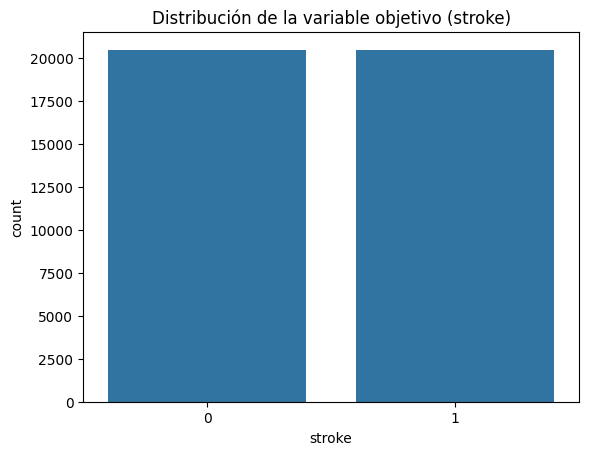

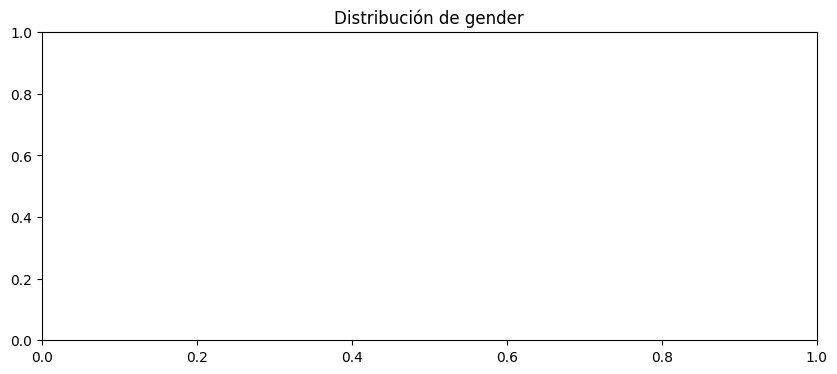

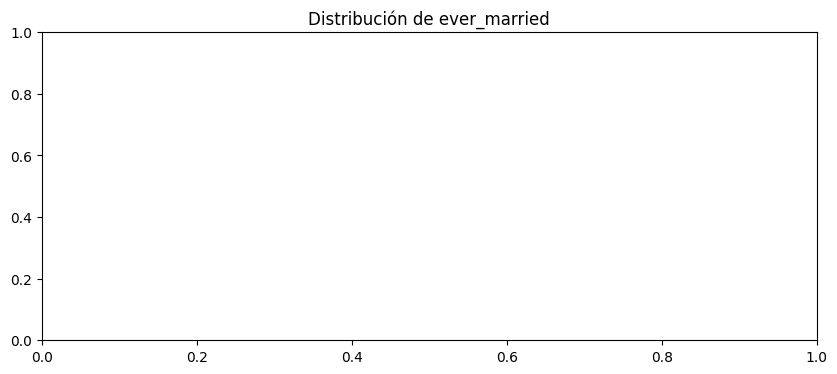

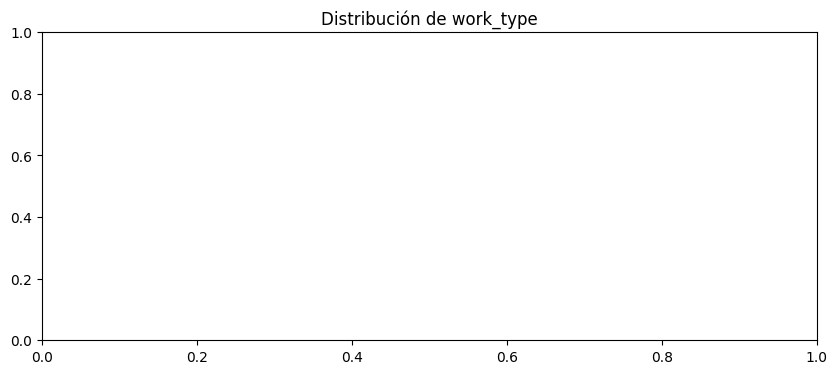

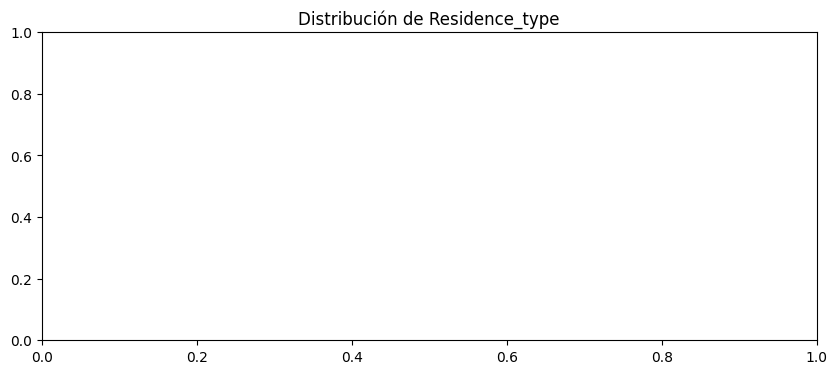

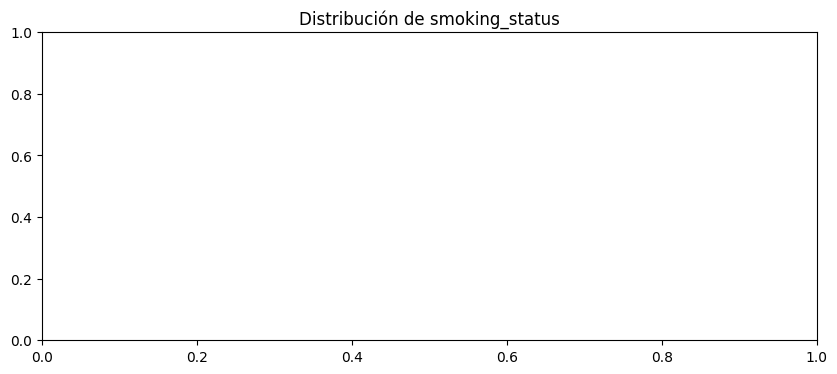

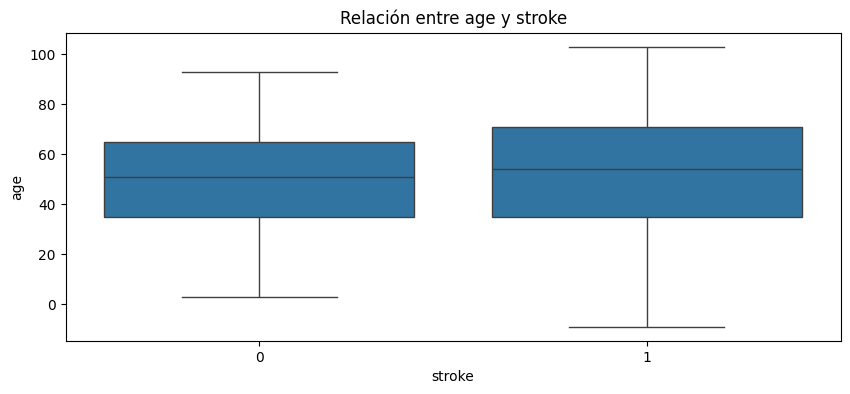

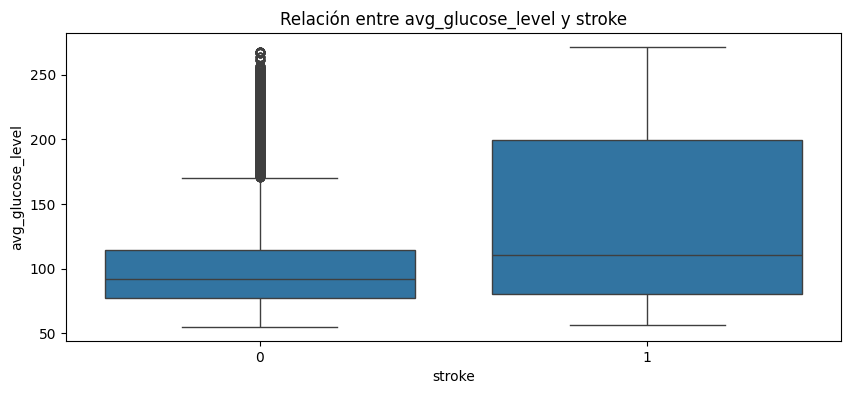

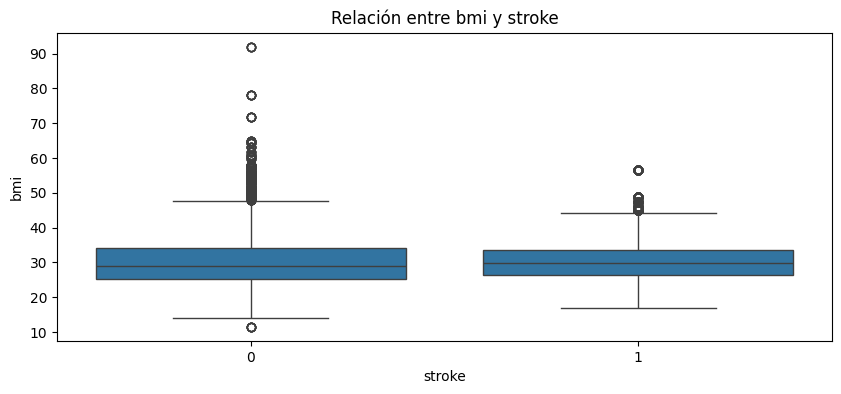

Características seleccionadas: Index(['sex', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


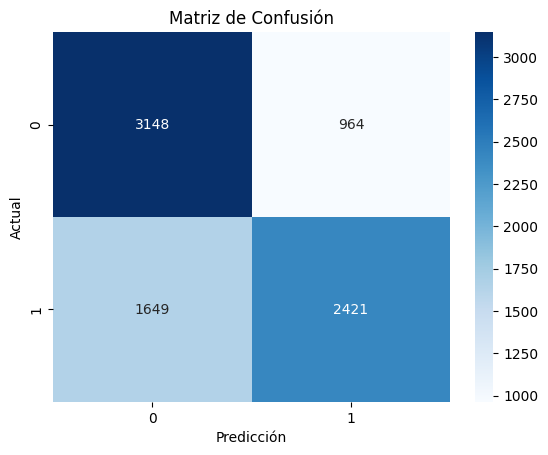

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      4112
           1       0.72      0.59      0.65      4070

    accuracy                           0.68      8182
   macro avg       0.69      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182



In [7]:
# Instalar bibliotecas necesarias
!pip install pandas matplotlib seaborn scikit-learn

# Mostrar las primeras filas del DataFrame
df.head()

# Información básica del DataFrame
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Comprobar valores nulos
df.isnull().sum()

# Eliminar filas con valores nulos (si es necesario)
df.dropna(inplace=True)

# Distribución de la variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='stroke', data=df)
plt.title('Distribución de la variable objetivo (stroke)')
plt.show()

# Distribución de variables categóricas
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribución de {var}')
    plt.show()

# Relación entre variables numéricas y la variable objetivo
numeric_vars = ['age', 'avg_glucose_level', 'bmi']
for var in numeric_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='stroke', y=var, data=df)
    plt.title(f'Relación entre {var} y stroke')
    plt.show()

# Codificar variables categóricas
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for var in categorical_vars:
    le = LabelEncoder()
    label_encoders[var] = le

# Normalizar variables numéricas
scaler = StandardScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Separar características (X) y variable objetivo (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Selección de características usando SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(report)

# Conclusiones:
# 1. El modelo de regresión logística ha sido capaz de predecir la ocurrencia de accidentes cerebrovasculares con una precisión aceptable.
# 2. Las características más importantes para la predicción han sido seleccionadas utilizando SelectKBest.

# Recomendaciones:
# 1. Implementar el modelo en un entorno clínico para evaluar su desempeño en datos reales.
# 2. Considerar la recolección de más datos para mejorar la precisión del modelo.
# 3. Explorar otros algoritmos de clasificación y técnicas de mejora del modelo, como el ajuste de hiperparámetros y el uso de ensembles.
